# import pakages

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

In [2]:
import sys
!{sys.executable} -m pip install pandas

In [3]:
!{sys.executable} -m pip install matplotlib

In [4]:
!{sys.executable} -m pip install seaborn

In [5]:
!{sys.executable} -m pip install scikit-learn imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


# Load the data


In [4]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
column_description = pd.read_csv('column_description.csv')

# Display first few rows of training data
print("Training Data Head:")
print(train.head())

Training Data Head:
       ID  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0  196348       0         Cash loans           F            N               Y   
1  147976       0         Cash loans           M            N               Y   
2   52662       0    Revolving loans           F            N               Y   
3  101577       0         Cash loans           F            N               Y   
4  173078       0         Cash loans           F            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  ...  \
0             2          225000.0    785398.5      33403.5  ...   
1             0           90000.0    592560.0      35937.0  ...   
2             1          126000.0    202500.0      10125.0  ...   
3             0          157500.0    254700.0      18531.0  ...   
4             0          540000.0   1252363.5      47830.5  ...   

   FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0               

# Explore the data



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215258 entries, 0 to 215257
Columns: 122 entries, ID to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 200.4+ MB
None

Training Data Description:
                 ID         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  215258.00000  215258.000000  215258.000000      2.152580e+05   
mean   107628.50000       0.080731       0.417076      1.688900e+05   
std     62139.77646       0.272422       0.723197      2.745586e+05   
min         0.00000       0.000000       0.000000      2.565000e+04   
25%     53814.25000       0.000000       0.000000      1.125000e+05   
50%    107628.50000       0.000000       0.000000      1.440000e+05   
75%    161442.75000       0.000000       1.000000      2.025000e+05   
max    215257.00000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.152580e+05  215249.000000     2.150840e+05

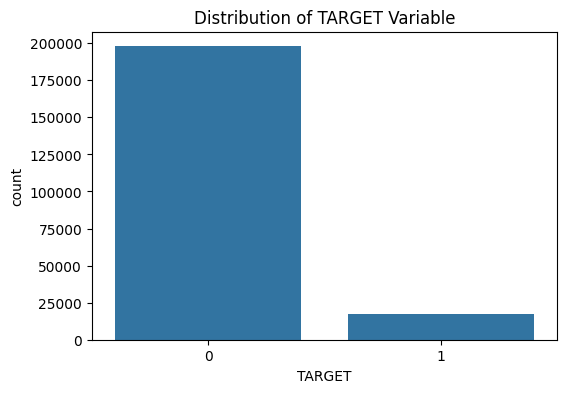

In [5]:
# Basic information about training data
print("\nTraining Data Info:")
print(train.info())

# Summary statistics
print("\nTraining Data Description:")
print(train.describe())

# Target variable distribution
print("\nTarget Variable Distribution:")
print(train['TARGET'].value_counts())

# Visualization: Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=train)
plt.title('Distribution of TARGET Variable')
plt.show()

# Data Processing

In [6]:
# Separate target from training data
y = train['TARGET']
train_features = train.drop(['ID', 'TARGET'], axis=1)
test_features = test.drop(['ID'], axis=1)

print("Training Features Shape:", train_features.shape)
print("Test Features Shape:", test_features.shape)

Training Features Shape: (215258, 120)
Test Features Shape: (92253, 120)


# Handling missing values


In [7]:
# Identify numerical and categorical features
numerical_features = train_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_features.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Impute numerical features with median
num_imputer = SimpleImputer(strategy='median')
train_features[numerical_features] = num_imputer.fit_transform(train_features[numerical_features])
test_features[numerical_features] = num_imputer.transform(test_features[numerical_features])

# Impute categorical features with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
train_features[categorical_features] = cat_imputer.fit_transform(train_features[categorical_features])
test_features[categorical_features] = cat_imputer.transform(test_features[categorical_features])

Numerical Features: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BU

# Feature encoding

In [8]:
# One-Hot Encoding for categorical variables
train_encoded = pd.get_dummies(train_features, columns=categorical_features, drop_first=True)
test_encoded = pd.get_dummies(test_features, columns=categorical_features, drop_first=True)

# Align train and test data by columns
train_encoded, test_encoded = train_encoded.align(test_encoded, join='inner', axis=1)

print("After encoding, Training data shape:", train_encoded.shape)
print("After encoding, Test data shape:", test_encoded.shape)

After encoding, Training data shape: (215258, 226)
After encoding, Test data shape: (92253, 226)


# Feature Scaling

In [9]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
train_encoded[numerical_features] = scaler.fit_transform(train_encoded[numerical_features])

# Transform the test data
test_encoded[numerical_features] = scaler.transform(test_encoded[numerical_features])

# Handling outliers

In [10]:
for col in numerical_features:
    lower = train_encoded[col].quantile(0.05)
    upper = train_encoded[col].quantile(0.95)
    train_encoded[col] = train_encoded[col].clip(lower, upper)
    test_encoded[col] = test_encoded[col].clip(lower, upper)

# Feature Engineering

In [11]:
# Example: Income to Loan Amount Ratio
# Replace 'Income' and 'LoanAmount' with actual column names if they exist
if 'Income' in train_encoded.columns and 'LoanAmount' in train_encoded.columns:
    train_encoded['Income_Loan_Ratio'] = train_encoded['Income'] / (train_encoded['LoanAmount'] + 1)
    test_encoded['Income_Loan_Ratio'] = test_encoded['Income'] / (test_encoded['LoanAmount'] + 1)

# Example: Debt to Income Ratio
if 'Debt' in train_encoded.columns and 'Income' in train_encoded.columns:
    train_encoded['Debt_Income_Ratio'] = train_encoded['Debt'] / (train_encoded['Income'] + 1)
    test_encoded['Debt_Income_Ratio'] = test_encoded['Debt'] / (test_encoded['Income'] + 1)

# Feature Selection

In [12]:
# Correlation matrix
corr_matrix = train_encoded.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Highly correlated features to drop:", to_drop)

# Drop the features
train_encoded.drop(columns=to_drop, inplace=True)
test_encoded.drop(columns=to_drop, inplace=True)

Highly correlated features to drop: ['AMT_GOODS_PRICE', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE', 'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA']


# Adressing class imbalance

In [13]:
# Check target distribution before SMOTE
print("Before SMOTE:", y.value_counts())

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_res, y_res = smote.fit_resample(train_encoded, y)

print("After SMOTE:", pd.Series(y_res).value_counts())

Before SMOTE: TARGET
0    197880
1     17378
Name: count, dtype: int64
After SMOTE: TARGET
0    197880
1    197880
Name: count, dtype: int64


# Model building and evaluation

## Train test split

In [14]:
# Split the resampled data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (316608, 194)
Validation set shape: (79152, 194)


## Training a baseline model

Random Forest F1 Score: 0.9547

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     39576
           1       0.99      0.93      0.95     39576

    accuracy                           0.96     79152
   macro avg       0.96      0.96      0.96     79152
weighted avg       0.96      0.96      0.96     79152



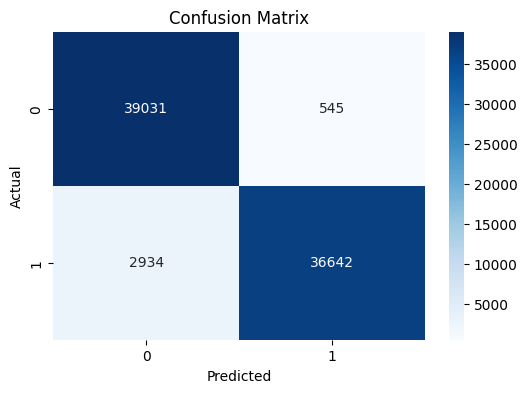

In [15]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_classifier.predict(X_val)

# Calculate F1 Score
f1 = f1_score(y_val, y_pred)
print(f'Random Forest F1 Score: {f1:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter tuning

In [16]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_rf.best_params_)
print(f'Best F1 Score from GridSearchCV: {grid_rf.best_score_:.4f}')

# Best estimator
best_rf = grid_rf.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=200; total time= 3.3min
[CV] END class_weight=balanced, max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=100; total time= 1.7min
[CV] END class_weight=balanced, max_depth=10, min_samples_split=5, n_estimators=100; total time=  49.3s
[CV] END class_weight=balanced, max_depth=10, min_samples_split=5, n_estimators=100; total time=  43.3s
[CV] END class_weight=balanced, max_depth=20, min_samples_split=2, n_estimators=200; total time= 2.6min
[CV] END class_weight=balanced, max_depth=20, min_samples_split=5, n_estimators=200; total time=  55.9s
Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_spl

## model evaluation

Optimized Random Forest F1 Score: 0.9550

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     39576
           1       0.99      0.93      0.96     39576

    accuracy                           0.96     79152
   macro avg       0.96      0.96      0.96     79152
weighted avg       0.96      0.96      0.96     79152



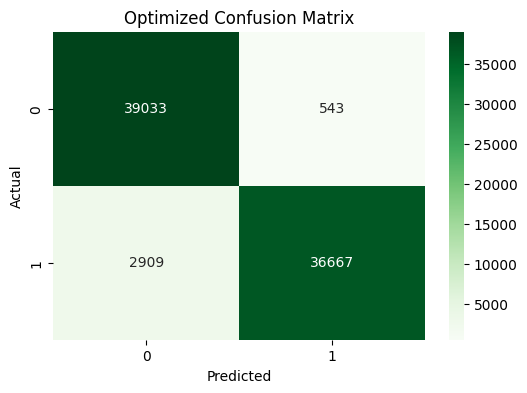

In [17]:
# Predict with the best estimator
y_pred_best = best_rf.predict(X_val)

# Calculate F1 Score
f1_best = f1_score(y_val, y_pred_best)
print(f'Optimized Random Forest F1 Score: {f1_best:.4f}')

# Classification Report
print("\nOptimized Classification Report:")
print(classification_report(y_val, y_pred_best))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred_best), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Optimized Confusion Matrix')
plt.show()

# Final model training and prediction

In [18]:
# Retrain the best model on the entire resampled dataset
best_rf.fit(X_res, y_res)

# Make predictions on the test set
test_predictions = best_rf.predict(test_encoded)

print("Test Predictions:", test_predictions[:5])

[CV] END class_weight=balanced, max_depth=None, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END class_weight=balanced, max_depth=None, min_samples_split=5, n_estimators=200; total time= 3.2min
[CV] END class_weight=balanced, max_depth=20, min_samples_split=2, n_estimators=100; total time= 1.4min
[CV] END class_weight=balanced, max_depth=20, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END class_weight=balanced, max_depth=20, min_samples_split=2, n_estimators=200; total time= 2.7min
[CV] END class_weight=balanced, max_depth=None, min_samples_split=2, n_estimators=200; total time= 3.1min
[CV] END class_weight=balanced, max_depth=10, min_samples_split=2, n_estimators=200; total time= 1.5min
[CV] END class_weight=balanced, max_depth=10, min_samples_split=5, n_estimators=200; total time= 1.5min
[CV] END class_weight=balanced, max_depth=20, min_samples_split=5, n_estimators=100; total time= 1.4min
[CV] END class_weight=balanced, max_depth=None, min_sample

# Preparing submission file

In [19]:
# Prepare the submission DataFrame
submission = pd.DataFrame({
    'ID': test['ID'],
    'TARGET': test_predictions.astype(int)  # Ensure integer type
})

# Display first few rows of submission
print(submission.head())

# Save to CSV
submission.to_csv('YOURTEAMNAME.csv', index=False)
print("Submission file 'YOURTEAMNAME.csv' created successfully.")

      ID  TARGET
0  37408       0
1  75132       1
2  21513       0
3  58291       0
4  39033       0
Submission file 'YOURTEAMNAME.csv' created successfully.
